In [1]:
import pandas as pd
mouse_scores=pd.read_csv("../output/variant_scoring/alpha_control/vanRheene_2021_250kb_from_lead.mean.variant_scores.tsv",\
                         sep='\t')
human_scores=pd.read_csv("../output/variant_scoring/answer_als/vanRheene_2021_250kb_from_lead.mean.variant_scores.tsv",\
                         sep='\t')

### plot correlation

In [1]:
import sys
sys.path.append("/oak/stanford/groups/akundaje/ziwei75/promoter_enhancer_models/notebooks")
import matplotlib.pyplot as plt
import all_utils as utils
def check_performance(predictions,labels,plot=False):
    from sklearn.metrics import mean_squared_error
    import scipy
    %precision %.2f
    print("MSE {:,.2f}".format(mean_squared_error(predictions,labels)))
    print("pearsonr {:,.2f}".format(scipy.stats.pearsonr(predictions,labels)[0]))
    print("spearmanr {:,.2f}".format(scipy.stats.spearmanr(predictions,labels)[0]))
    
    xmin = min([predictions.min(),labels.min()])
    xmax = max([predictions.max(),labels.max()])
    print("_______________")
    if plot:
        plt.figure()
        utils.density_scatter(predictions,labels,
                        xlab='predictions',
                        ylab='labels')
#         plt.xlim([xmin,xmax])
#         plt.ylim([xmin,xmax])
        plt.show()
    
    


In [6]:
human_lfc = human_scores['logfc.mean'].values
mouse_lfc = mouse_scores['logfc.mean'].values


MSE 0.01
pearsonr 0.34
spearmanr 0.53
_______________


<Figure size 432x288 with 0 Axes>

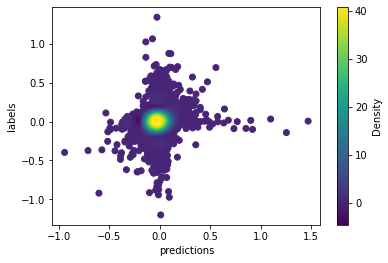

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
check_performance(human_lfc,mouse_lfc,plot=True)

### plot significant variants correlation

MSE 0.02
pearsonr 0.34
spearmanr 0.48
_______________


<Figure size 432x288 with 0 Axes>

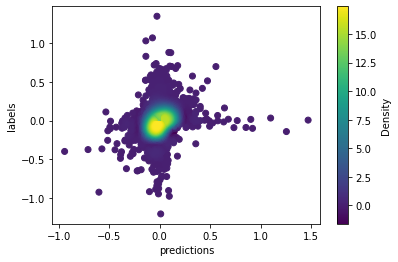

In [8]:
cutoff=0.05
human_lfc = human_scores[(human_scores['logfc.mean'].abs() > cutoff) | ((mouse_scores['logfc.mean'].abs() > cutoff))]['logfc.mean'].values
mouse_lfc = mouse_scores[(human_scores['logfc.mean'].abs() > cutoff) | ((mouse_scores['logfc.mean'].abs() > cutoff))]['logfc.mean'].values
check_performance(human_lfc,mouse_lfc,plot=True)

In [9]:
significant_variants=['rs10463311','rs553196048','rs143956135','rs11789832',\
                     'rs538156463','rs187064754','rs141687016','rs12608932','rs117432102']

In [80]:
human_scores[human_scores['variant_id'] == 'rs10463311']

,chr,pos,variant_id,allele1,allele2,logfc.mean,logfc.mean.pval,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,logfc_x_jsd.mean,logfc_x_jsd.mean.pval,abs_logfc_x_jsd.mean,abs_logfc_x_jsd.mean.pval
17259,chr5,151031274,rs10463311,C,T,0.01124,0.669261,0.013642,0.682002,0.0057,0.533059,0.000063,0.664465,0.000077,0.67675


In [71]:
variant_coords=[]
for var in significant_variants:
    human_s = human_scores[human_scores['variant_id']==var]
    mouse_s = mouse_scores[mouse_scores['variant_id']==var]
    print(var)
    print("human logfc JSD", human_s[['logfc.mean.pval','jsd.mean.pval']].values)
    print("mouse logfc JSD", mouse_s[['logfc.mean.pval','jsd.mean.pval']].values)
    if len(human_s) > 0:
        chromo,pos = human_s[['chr','pos']].values[0]
        variant_coords += [[chromo,pos]]

rs10463311
human logfc JSD [[0.66926127 0.53305888]]
mouse logfc JSD [[0.53375862 0.52341201]]
rs553196048
human logfc JSD [[0.68622299 0.67850265]]
mouse logfc JSD [[0.70750117 0.73262247]]
rs143956135
human logfc JSD [[0.83806305 0.78270787]]
mouse logfc JSD [[0.84476021 0.86131321]]
rs11789832
human logfc JSD [[0.1251372  0.42633603]]
mouse logfc JSD [[0.40410324 0.37987995]]
rs538156463
human logfc JSD []
mouse logfc JSD []
rs187064754
human logfc JSD [[0.7989136  0.87346624]]
mouse logfc JSD [[0.33647875 0.33850893]]
rs141687016
human logfc JSD []
mouse logfc JSD []
rs12608932
human logfc JSD [[0.40131988 0.67902939]]
mouse logfc JSD [[0.81455323 0.57383358]]
rs117432102
human logfc JSD [[0.55688049 0.47240585]]
mouse logfc JSD [[0.20925233 0.24470474]]


In [72]:
import pandas as pd
peaks = pd.read_csv("/oak/stanford/groups/akundaje/ziwei75/ALS_colab/answer_ALS/chrombpnet_input/all_peaks_pooled.merged.bed",\
           sep='\t',header=None)

In [73]:
variant_coords += [['chr5',151047925]]

In [74]:
for chromo, pos in variant_coords:
    print(chromo,pos)
    print(peaks[(peaks[0] == chromo) & (peaks[1] < pos) & (peaks[2] > pos)])

chr5 151031274
Empty DataFrame
Columns: [0, 1, 2]
Index: []
chr9 27321049
Empty DataFrame
Columns: [0, 1, 2]
Index: []
chr9 27632744
Empty DataFrame
Columns: [0, 1, 2]
Index: []
chr9 27675212
Empty DataFrame
Columns: [0, 1, 2]
Index: []
chr9 27804554
Empty DataFrame
Columns: [0, 1, 2]
Index: []
chr19 17641880
Empty DataFrame
Columns: [0, 1, 2]
Index: []
chr20 50005822
Empty DataFrame
Columns: [0, 1, 2]
Index: []
chr5 151047925
           0          1          2
122843  chr5  151047866  151048166


In [75]:
peaks=pd.read_csv("/oak/stanford/groups/akundaje/ziwei75/ALS_colab/answer_ALS/3_peaks/CTRL-NEUFL733GX5/CTRL-NEUFL733GX5-7759-E/CTRL-NEUFL733GX5-7759-E_overlap.optimal_peak.narrowPeak.gz",\
                 sep='\t',header=None)

In [76]:
for chromo, pos in variant_coords:
    print(chromo,pos)
    print(peaks[(peaks[0] == chromo) & (peaks[1] < pos) & (peaks[2] > pos)])

chr5 151031274
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index: []
chr9 27321049
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index: []
chr9 27632744
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index: []
chr9 27675212
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index: []
chr9 27804554
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index: []
chr19 17641880
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index: []
chr20 50005822
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Index: []
chr5 151047925
           0          1          2           3    4  5        6         7  \
111400  chr5  151047923  151048116  Peak_57875  160  .  4.50402  16.01415   

               8   9  
111400  13.67683  93  


In [77]:
peaks=peaks.sort_values([0,1,2])

In [78]:
peaks[(peaks[0]=='chr5') & (peaks[1] > 151031000)]

,0,1,2,3,4,5,6,7,8,9
111400,chr5,151047923,151048116,Peak_57875,160,.,4.50402,16.01415,13.67683,93
111401,chr5,151051611,151052174,Peak_159659,47,.,2.41663,4.79581,2.85388,482
111402,chr5,151051611,151052174,Peak_29825,374,.,6.95397,37.40777,34.77205,243
111404,chr5,151080493,151081552,Peak_4338,1000,.,12.03876,226.91467,223.31802,186
111405,chr5,151080493,151081552,Peak_5778,1000,.,10.87038,192.76169,189.30443,624
...,...,...,...,...,...,...,...,...,...,...
113539,chr5,181265212,181265737,Peak_61208,147,.,2.84069,14.71172,12.40048,344
113540,chr5,181265212,181265737,Peak_87615,90,.,2.33039,9.07835,6.91777,101
113541,chr5,181273416,181273629,Peak_111286,68,.,3.32563,6.88348,4.80789,97
113542,chr5,181281019,181282053,Peak_10374,1000,.,10.19629,120.94300,117.79206,646


### generate predictions spreadsheet

In [98]:
import pandas as pd
import pandas as pd
peaks = pd.read_csv("/oak/stanford/groups/akundaje/ziwei75/ALS_colab/answer_ALS/chrombpnet_input/all_peaks_pooled.merged.bed",\
           sep='\t',header=None)

mouse_scores=pd.read_csv("../output/variant_scoring/alpha_control/vanRheene_2021_250kb_from_lead.mean.variant_scores.tsv",\
                         sep='\t')
human_scores=pd.read_csv("../output/variant_scoring/answer_als/vanRheene_2021_250kb_from_lead.mean.variant_scores.tsv",\
                         sep='\t')

In [99]:
total_scores = []
for i, row in mouse_scores.iterrows():
    variant_info = row.values[:5]
    mouse_s = row.values[5:]
    human_s = human_scores.iloc[i][5:]
    total_scores += [list(variant_info) + list(mouse_s) + list(human_s)]


In [100]:
import pandas as pd
total_scores = pd.DataFrame(total_scores)

In [101]:
score_columns = mouse_scores.columns[5:]

In [102]:
column_names = list(mouse_scores.columns[:5]) + ["mouse_" + s for s in list(score_columns)] + ["human_" + s for s in list(score_columns)]



In [103]:
total_scores.columns = column_names

MSE 0.01
pearsonr 0.34
spearmanr 0.53
_______________


<Figure size 720x216 with 0 Axes>

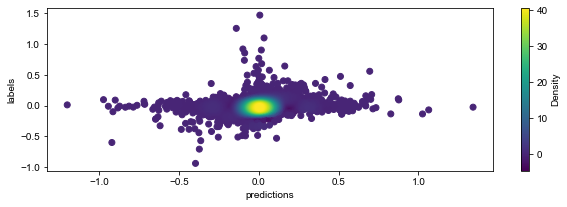

In [104]:
check_performance(total_scores['mouse_logfc.mean'],total_scores['human_logfc.mean'],plot=True)

In [105]:
from tqdm import tqdm
peak_bool = []
for i, row in tqdm(total_scores.iterrows()):
    chromo, pos = row.values[:2]

    if len(peaks[(peaks[0] == chromo) & (peaks[1] < pos) & (peaks[2] > pos)]) > 0:
        peak_bool += [True]
    else:
        peak_bool += [False]

29575it [05:28, 90.06it/s]


In [106]:
total_scores['in_human_peak'] = peak_bool

In [107]:
total_scores.to_csv("/oak/stanford/groups/akundaje/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/mouse_and_human_variant_score.tsv",\
                   sep='\t',index=False)

### generate shap scores

In [45]:
import pandas as pd
import pyfaidx

import deepdish as dd
import json
import numpy as np
import tensorflow as tf
import pandas as pd
import shap
import pyfaidx
import shutil
import errno
import os
import argparse
# disable eager execution so shap deep explainer wont break
tf.compat.v1.disable_eager_execution()

import numpy as np
import shap
import tensorflow as tf

from deeplift.dinuc_shuffle import dinuc_shuffle


def combine_mult_and_diffref(mult, orig_inp, bg_data):
    to_return = []
    
    for l in [0]:
        projected_hypothetical_contribs = \
            np.zeros_like(bg_data[l]).astype("float")
        assert len(orig_inp[l].shape)==2
        
        # At each position in the input sequence, we iterate over the
        # one-hot encoding possibilities (eg: for genomic sequence, 
        # this is ACGT i.e. 1000, 0100, 0010 and 0001) and compute the
        # hypothetical difference-from-reference in each case. We then 
        # multiply the hypothetical differences-from-reference with 
        # the multipliers to get the hypothetical contributions. For 
        # each of the one-hot encoding possibilities, the hypothetical
        # contributions are then summed across the ACGT axis to 
        # estimate the total hypothetical contribution of each 
        # position. This per-position hypothetical contribution is then
        # assigned ("projected") onto whichever base was present in the
        # hypothetical sequence. The reason this is a fast estimate of
        # what the importance scores *would* look like if different 
        # bases were present in the underlying sequence is that the
        # multipliers are computed once using the original sequence, 
        # and are not computed again for each hypothetical sequence.
        for i in range(orig_inp[l].shape[-1]):
            hypothetical_input = np.zeros_like(orig_inp[l]).astype("float")
            hypothetical_input[:, i] = 1.0
            hypothetical_difference_from_reference = \
                (hypothetical_input[None, :, :] - bg_data[l])
            hypothetical_contribs = hypothetical_difference_from_reference * \
                                    mult[l]
            projected_hypothetical_contribs[:, :, i] = \
                np.sum(hypothetical_contribs, axis=-1) 
            
        to_return.append(np.mean(projected_hypothetical_contribs,axis=0))

    if len(orig_inp)>1:
        to_return.append(np.zeros_like(orig_inp[1]))
    
    return to_return


def shuffle_several_times(s,numshuffles=20):
    if len(s)==2:
        return [np.array([dinuc_shuffle(s[0]) for i in range(numshuffles)]),
                np.array([s[1] for i in range(numshuffles)])]
    else:
        return [np.array([dinuc_shuffle(s[0]) for i in range(numshuffles)])]


def get_weightedsum_meannormed_logits(model):
    # Assumes the 0 task track is for profile
    # See Google slide deck for explanations
    # We meannorm as per section titled 
    # "Adjustments for Softmax Layers" in the DeepLIFT paper
    meannormed_logits = (model.outputs[0] - \
                         tf.reduce_mean(model.outputs[0], axis=1)[:, None])

    # 'stop_gradient' will prevent importance from being propagated
    # through this operation; we do this because we just want to treat
    # the post-softmax probabilities as 'weights' on the different 
    # logits, without having the network explain how the probabilities
    # themselves were derived. Could be worth contrasting explanations
    # derived with and without stop_gradient enabled...
    stopgrad_meannormed_logits = tf.stop_gradient(meannormed_logits)
    softmax_out = tf.nn.softmax(stopgrad_meannormed_logits, axis=1)
    
    # Weight the logits according to the softmax probabilities, take
    # the sum for each example. This mirrors what was done for the
    # bpnet paper.
    weightedsum_meannormed_logits = tf.reduce_sum(softmax_out * \
                                                  meannormed_logits,
                                                  axis=1)
    
    return weightedsum_meannormed_logits

import shap
def get_shap_score(model_counts_explainer,input_seq):
    counts_shap_scores = model_counts_explainer.shap_values(
        input_seq, progress_message=100)
    return counts_shap_scores

genome = pyfaidx.Fasta("/oak/stanford/groups/akundaje/ziwei75/T2D_MPRA/data/ref_data/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta")

sys.path.append("/oak/stanford/groups/akundaje/ziwei75/reporterNet/reporterNet/reporterNet/utils")
import one_hot
def get_seq(variant_df):
    allele1_sequences = []
    allele2_sequences = []
    for i, row in tqdm(variant_df.iterrows()):
        chromo = row['chr']
        pos = row['pos'] - 1
        ref = row['allele1']
        alt = row['allele2']
        assert genome[chromo][pos:pos+len(ref)].seq == ref or genome[chromo][pos:pos+len(ref)].seq == alt

        left_flank = genome[chromo][pos-1057:pos].seq
        ref_right_flank = genome[chromo][pos+len(ref):pos+1057].seq
        alt_right_flank = genome[chromo][pos+len(ref):pos+1057+len(ref)-len(alt)].seq

        ref_seq = left_flank + ref + ref_right_flank
        alt_seq = left_flank + alt + alt_right_flank
        assert len(ref_seq) == 2114
        assert len(alt_seq) == 2114
        allele1_sequences += [ref_seq]
        allele2_sequences += [alt_seq]
        
    allele1_sequences=one_hot.dna_to_one_hot(allele1_sequences)
    allele2_sequences=one_hot.dna_to_one_hot(allele2_sequences)
    return allele1_sequences,allele2_sequences

In [141]:
sig_variants = total_scores[(total_scores['mouse_logfc.mean.pval'] < 0.05) | (total_scores['human_logfc.mean.pval'] < 0.05)]

In [131]:
allele1_sequences,allele2_sequences = get_seq(sig_variants)

1677it [00:00, 7596.72it/s]


In [132]:
from tqdm import tqdm
%matplotlib inline
import os
from tqdm import tqdm
import matplotlib.patches as patches
sys.path.append("/users/ziwei75/kerasAC")
from kerasAC.vis import * 
plt.rcParams["figure.figsize"] = (40,10)
import os
from tensorflow.keras.models import Sequential, Model, load_model

for model_type in ["mouse","human"]:
    ref_shap_scores = []
    alt_shap_scores = []
    for fold_number in range(5):
        if model_type=='human':
            save_dir = "/oak/stanford/groups/akundaje/ziwei75/ALS_colab/models/2023_11_7_answer_als/merged_control/fold%s/models/"
            saved_model_name = "chrombpnet_nobias"
        else:
            assert model_type == "mouse"
            save_dir = "/oak/stanford/groups/akundaje/ziwei75/ALS_colab/models/2023_8_10/alpha_control/fold%s/models/"
            saved_model_name = "chrombpnet_nobias"

        model_name = save_dir%fold_number + saved_model_name
        model_path = model_name + '.h5'
        print(model_path)
        model = load_model(model_path)
        counts_model_input = model.input

        model_counts_explainer = shap.explainers.deep.TFDeepExplainer(
            (counts_model_input, tf.reduce_sum(model.outputs[1], axis=-1)),
            shuffle_several_times,
            combine_mult_and_diffref=combine_mult_and_diffref)


        ref_shap_scores += [get_shap_score(model_counts_explainer,np.array(allele1_sequences))]
        alt_shap_scores += [get_shap_score(model_counts_explainer,np.array(allele2_sequences))]
    ref_shap_scores = np.stack(ref_shap_scores)
    alt_shap_scores = np.stack(alt_shap_scores)
    ref_shap_scores = np.average(ref_shap_scores,axis=0)
    alt_shap_scores = np.average(alt_shap_scores,axis=0)

    output_folder="/oak/stanford/groups/akundaje/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/"
    np.save(output_folder + "%s_ref_shap.npy"%model_type,ref_shap_scores)
    np.save(output_folder + "%s_alt_shap.npy"%model_type,alt_shap_scores)


/oak/stanford/groups/akundaje/ziwei75/ALS_colab/models/2023_8_10/alpha_control/fold0/models/chrombpnet_nobias.h5


Done 0 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 1600 examples of 1677
/oak/stanford/groups/akundaje/ziwei75/ALS_colab/models/2023_8_10/alpha_control/fold1/models/chrombpnet_

Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 2

Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 2

Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 2

Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 2

Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 2

Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 2

Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 100 examples of 1677
Done 2

Done 0 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677
Done 0 examples of 1677
Done 100 examples of 1677
Done 200 examples of 1677
Done 300 examples of 1677
Done 400 examples of 1677
Done 500 examples of 1677
Done 600 examples of 1677
Done 700 examples of 1677
Done 800 examples of 1677
Done 900 examples of 1677
Done 1000 examples of 1677
Done 1100 examples of 1677
Done 1200 examples of 1677
Done 1300 examples of 1677
Done 1400 examples of 1677
Done 1500 examples of 1677
Done 1600 examples of 1677


### generate shap figures

In [133]:
import os

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter

#Helper function to draw a letter within a sequence logo
def dna_letter_at(letter, x, y, yscale=1, ax=None, color=None, alpha=1.0):

    fp = FontProperties(family="DejaVu Sans", weight="bold")

    globscale = 1.35

    LETTERS = {
        "T": TextPath((-0.305, 0), "T", size=1, prop=fp),
        "G": TextPath((-0.384, 0), "G", size=1, prop=fp),
        "A": TextPath((-0.35, 0), "A", size=1, prop=fp),
        "C": TextPath((-0.366, 0), "C", size=1, prop=fp),
        "UP": TextPath((-0.488, 0), "$\\Uparrow$", size=1, prop=fp),
        "DN": TextPath((-0.488, 0), "$\\Downarrow$", size=1, prop=fp),
        "(": TextPath((-0.25, 0), "(", size=1, prop=fp),
        ".": TextPath((-0.125, 0), "-", size=1, prop=fp),
        ")": TextPath((-0.1, 0), ")", size=1, prop=fp),
    }

    COLOR_SCHEME = {
        "G": "orange",
        "A": "green",
        "C": "blue",
        "T": "red",
        "UP": "green",
        "DN": "red",
        "(": "black",
        ".": "black",
        ")": "black",
    }

    text = LETTERS[letter]

    chosen_color = COLOR_SCHEME[letter]
    if color is not None:
        chosen_color = color

    t = (
        mpl.transforms.Affine2D().scale(1 * globscale, yscale * globscale)
        + mpl.transforms.Affine2D().translate(x, y)
        + ax.transData
    )
    p = PathPatch(text, lw=0, fc=chosen_color, alpha=alpha, transform=t)

    if ax != None:
        ax.add_artist(p)
    return p

#Function to plot an input-gated sequence logo
def plot_seq_scores(importance_scores, ax, dpi=None, figsize=(16, 2), plot_y_ticks=True, y_min=None, y_max=None, save_figs=False, fig_name="default"):

    importance_scores = importance_scores.T

#     fig = None
#     if dpi is not None :
#         fig = plt.figure(figsize=figsize, dpi=dpi)
#     else :
#         fig = plt.figure(figsize=figsize)


    ref_seq = ""
    for j in range(importance_scores.shape[1]):
        argmax_nt = np.argmax(np.abs(importance_scores[:, j]))

        if argmax_nt == 0:
            ref_seq += "A"
        elif argmax_nt == 1:
            ref_seq += "C"
        elif argmax_nt == 2:
            ref_seq += "G"
        elif argmax_nt == 3:
            ref_seq += "T"

#     ax = plt.gca()

    for i in range(0, len(ref_seq)):
        mutability_score = np.sum(importance_scores[:, i])
        color = None
        dna_letter_at(ref_seq[i], i + 0.5, 0, mutability_score, ax, color=color)

    plt.sca(ax)
    plt.xticks([], [])
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.3f"))

    plt.xlim((0, len(ref_seq)))

    # plt.axis('off')

    if plot_y_ticks:
        plt.yticks(fontsize=6)
    else:
        plt.yticks([], [])

    if y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)
    elif y_min is not None:
        plt.ylim(y_min)
    else:
        plt.ylim(
            np.min(importance_scores) - 0.1 * np.max(np.abs(importance_scores)),
            np.max(importance_scores) + 0.1 * np.max(np.abs(importance_scores)),
        )

    #plt.axhline(y=0.0, color="black", linestyle="-", linewidth=0.2)

    # for axis in fig.axes :
    #    axis.get_xaxis().set_visible(False)
    #    axis.get_yaxis().set_visible(False)

    plt.tight_layout()

#     if save_figs:
#         plt.savefig(fig_name + ".png", transparent=True, dpi=300)
#         plt.savefig(fig_name + ".pdf", dpi=300)



In [134]:
sig_variants=sig_variants.reset_index(drop=True)

In [139]:

# # %matplotlib inline
# from tqdm import tqdm
# import matplotlib.patches as patches
# plt.rcParams["figure.figsize"] = (10,3)
# shap_folder="/oak/stanford/groups/akundaje/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/"
# for model_type in ["mouse","human"]:
    
#     ref_shap="/oak/stanford/groups/akundaje/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/%s_ref_shap.npy"%model_type
#     alt_shap="/oak/stanford/groups/akundaje/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/%s_alt_shap.npy"%model_type
#     ref_shap_scores=np.load(ref_shap) 
#     alt_shap_scores=np.load(alt_shap)

#     xmin_ = 1057 - 100
#     xmax_ = 1057 + 100

#     for i in tqdm(range(len(ref_shap_scores))):
#         row = sig_variants.iloc[i]
#         variant_id = row['variant_id']
#         position = row['pos']
#         start = position - 100
#         end = position + 100
# #         if "promoter" in row['Amplicon']:
# #             xmin_ = 1057 - (position-left_promoter_window)
# #             xmax_ = 1057 + (right_promoter_window-position)
# #             start = left_promoter_window
# #             end = right_promoter_window
# #         else:
# #             xmin_ = 1057 - (position-left_enhancer_window)
# #             xmax_ = 1057 + (right_enhancer_window-position)                       
# #             start = left_enhancer_window
# #             end = right_enhancer_window


#         fig, axes = plt.subplots(2,1,figsize=(10,2), dpi=300)
#         a1_shap = (ref_shap_scores[i][1:]*allele1_sequences[i][1:])[xmin_:xmax_]
#         a2_shap = (alt_shap_scores[i][1:]*allele2_sequences[i][1:])[xmin_:xmax_]
#         plot_seq_scores(a1_shap,axes[0])
#         plot_seq_scores(a2_shap,axes[1])

#         ymin_ = min([a1_shap.min(),a2_shap.min()])
#         ymax_ = max([a1_shap.max(),a2_shap.max()])
        
#         rect = patches.Rectangle((1057-xmin_-1, ymin_), len(row['allele1']), ymax_-ymin_, linewidth=1, edgecolor='none', facecolor='grey',alpha=0.2)
#         axes[0].add_patch(rect)
#         rect = patches.Rectangle((1057-xmin_-1, ymin_), len(row['allele2']), ymax_-ymin_, linewidth=1, edgecolor='none', facecolor='grey',alpha=0.2)
#         axes[1].add_patch(rect)

#         axes[0].set_xticks(list(range(0,200,75)), list(range(start,end,75)),size=5)
#         axes[1].set_xticks(list(range(0,200,75)), list(range(start,end,75)),size=5)

#         axes[0].set_ylim([ymin_,ymax_])
#         axes[1].set_ylim([ymin_,ymax_])
        
#         ymin_ = round(ymin_,2)
#         ymax_ = round(ymax_,2)
#         axes[0].set_yticks(list(np.arange(ymin_,ymax_,0.08)),size=5)
#         axes[1].set_yticks(list(np.arange(ymin_,ymax_,0.08)),size=5)

#         plt.rcParams['pdf.fonttype'] = 42
#         plt.rc('font', family='Arial')
#         plt.savefig('/oak/stanford/groups/akundaje/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/%s_%s_count_shap.png'%(model_type,variant_id), dpi=fig.dpi)
# #         plt.show()



In [142]:
total_scores = pd.read_csv("/oak/stanford/groups/akundaje/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/mouse_and_human_variant_score.tsv",\
                   sep='\t')
sig_variants = sig_variants['variant_id'].values

In [143]:
human_figures = []
mouse_figures = []
for i,row in total_scores.iterrows():
    if row['variant_id'] in sig_variants:
        v_id = row['variant_id']
        human_shap_figure = '''=IMAGE(\"https://mitra.stanford.edu/kundaje/oak/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/human_%s_count_shap.png",4,256,1280)'''%v_id
        mouse_shap_figure = '''=IMAGE(\"https://mitra.stanford.edu/kundaje/oak/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/mouse_%s_count_shap.png",4,256,1280)'''%v_id
    else:
        human_shap_figure = "None"
        mouse_shap_figure = "None"
    human_figures += [human_shap_figure]
    mouse_figures += [mouse_shap_figure]

In [144]:
total_scores['human_figures'] = human_figures
total_scores['mouse_figures'] = mouse_figures

In [145]:
total_scores.to_excel("/oak/stanford/groups/akundaje/ziwei75/ALS_colab/output/variant_scoring/mouse_and_human/mouse_and_human_variant_score_including_shap.xlsx",\
                    index=False)


In [147]:
"rs73351374" in sig_variants

True

In [146]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
pwd: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
